In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터 전처리

In [2]:
X_before_selection = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/feature_and_target_without_zero.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/y_target_v2.csv')

In [3]:
X_before_selection = X_before_selection.astype(float)

In [4]:
feature_list = ["mean_alsfrs_total", 'diag_minus_onset', 'max_pulse', 'mean_alsfrs_hands', 'diag_delta', 'onset_site', 'treatment_group', 'min_bp_d', 'mean_alsfrs_mouth', 'fvc_max']

In [5]:
X = X_before_selection[feature_list]

In [6]:
y = y.drop(columns=['Unnamed: 0',"Unnamed: 0.1"])

### Train/Test set 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### 모델 생성 및 학습

### (1) Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
fitted_model_lr = model_lr.fit(X_train, y_train)

In [10]:
import statsmodels.api as sm
x_train1 = sm.add_constant(X_train,has_constant="add")

model = sm.OLS(y_train,X_train)
fitted_model_lr2 = model.fit()

fitted_model_lr2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ALSFRS_slope   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              430.6
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:20:04   Log-Likelihood:                         -1959.5
No. Observations:                2340   AIC:                                      3939.
Df Residuals:                    2330   BIC:                                      3997.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
mean_alsfrs_total    -0.0128      0.004     -3.469      0.001      -0.020      -0.006
diag_minus_onset      0.0002   4.81e-05      4.105      0.000       0.000       0.000
max_pulse            -0.0069      0.001     -8.348      0.000      -0.009      -0.005
mean_alsfrs_hands     0.0142      0.009      1.544      0.123      -0.004       0.032
diag_delta           -0.0002   5.03e-05     -3.389      0.001      -0.000   -7.19e-05
onset_site            0.0444      0.021      2.150      0.032       0.004       0.085
treatment_group       0.0489      0.028      1.772      0.077      -0.005       0.103
min_bp_d             -0.0065      0.001     -5.966      0.000      -0.009      -0.004
mean_alsfrs_mouth     0.0401      0.007      6.133      0.000       0.027       0.053
fvc_max           -9.395e-05      0.001     -0.126      0.900      -0.002       0.001
==============================================================================
Omnibus:                      196.185   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.176
Skew:                          -0.697   Prob(JB):                     2.62e-58
Kurtosis:                       3.883   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
fitted_model_lr2.params

mean_alsfrs_total   -0.012798
diag_minus_onset     0.000198
max_pulse           -0.006896
mean_alsfrs_hands    0.014196
diag_delta          -0.000171
onset_site           0.044357
treatment_group      0.048882
min_bp_d            -0.006477
mean_alsfrs_mouth    0.040130
fvc_max             -0.000094
dtype: float64

### (2) XGBoost

In [12]:
from xgboost import XGBRegressor

In [13]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[13:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### (3) Random Forests

In [14]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 모델 평가하기

### (1) MAE, RMSE, R2

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [16]:
# Predict를 수행하고 mean_absolute_error, rmse, r-squared 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))
print('XGB R2:',  r2_score(y_test, pred_xgb))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))
print('LR R2:',  r2_score(y_test, pred_lr))

print('RF MAE:', mean_absolute_error(y_test, pred_rf))
print('RF RMSE:', sqrt(mean_squared_error(y_test, pred_rf)))
print('RF R2:',  r2_score(y_test, pred_rf))

XGB MAE: 0.44843982545497457
XGB RMSE: 0.5717400498071279
XGB R2: 0.04760299823560521
LR MAE: 0.4512992259097665
LR RMSE: 0.5725535846970962
LR R2: 0.04489071865458871
RF MAE: 0.4432706565756075
RF RMSE: 0.566680256088498
RF R2: 0.06438548194863047


### (2) Pearson Correlation score

In [17]:
import scipy.stats as stats
print("XGB PC:", stats.pearsonr(x = y_test, y = pred_xgb))
print("LR PC:", stats.pearsonr(x = y_test, y = pred_lr))
print("RF PC:", stats.pearsonr(x = y_test, y = pred_rf))

TypeError: ignored

### (3) 실제 값과 추측 값 시각화

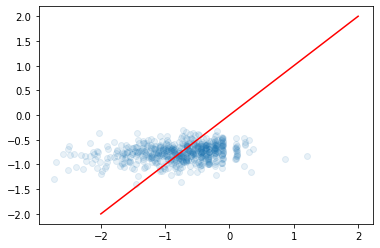

In [18]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

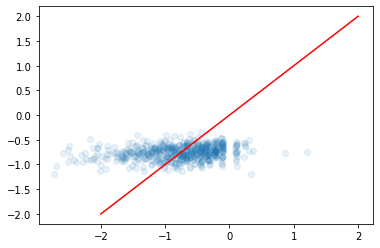

In [19]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

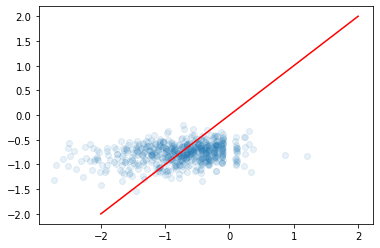

In [20]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_rf, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

### (4) XGBoost와 Random forest 모델의 feature importance 시각화

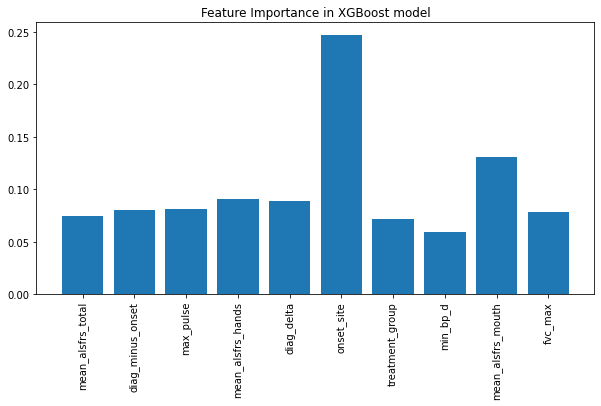

In [21]:
fig = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in XGBoost model')
plt.show()

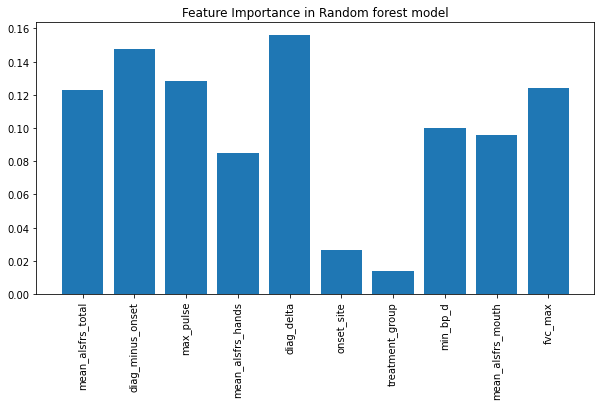

In [22]:
fig2 = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random forest model')
plt.show()

### 5-fold cross validation

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [24]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [25]:
scores_lr_r2 = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=folds)
scores_lr_rmse = cross_val_score(model_lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_lr_mae = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

In [26]:
scores_xgb_r2 = cross_val_score(model_xgb, X_train, y_train, scoring='r2', cv=folds)
scores_xgb_rmse = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_xgb_mae = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

[13:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [27]:
scores_rf_r2 = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=folds)
scores_rf_rmse = cross_val_score(model_rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_rf_mae = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [28]:
## Summary of LR model
print("MAE of LR model in 5 fold cv:", scores_lr_mae*(-1))
print("with its mean value:", scores_lr_mae.mean()*(-1))

print("R2 of LR model in 5 fold cv:", scores_lr_r2)
print("with its mean value:", scores_lr_r2.mean())

print("RMSE of LR model in 5 fold cv:", scores_lr_rmse*(-1))
print("with its mean value:", scores_lr_rmse.mean()*(-1))

MAE of LR model in 5 fold cv: [0.42856371 0.44444717 0.42191908 0.44281705 0.44541766]
with its mean value: 0.43663293482989285
R2 of LR model in 5 fold cv: [0.08192814 0.01996569 0.04490576 0.06261858 0.00446463]
with its mean value: 0.042776559843219195
RMSE of LR model in 5 fold cv: [0.54760044 0.5597012  0.5359834  0.57890824 0.56788683]
with its mean value: 0.5580160213543136


In [29]:
## Summary of XGB model
print("MAE of XGB model in 5 fold cv:", scores_xgb_mae*(-1))
print("with its mean value:", scores_xgb_mae.mean()*(-1))

print("R2 of XGB model in 5 fold cv:", scores_xgb_r2)
print("with its mean value:", scores_xgb_r2.mean())

print("RMSE of XGB model in 5 fold cv:", scores_xgb_rmse*(-1))
print("with its mean value:", scores_xgb_rmse.mean()*(-1))

MAE of XGB model in 5 fold cv: [0.41555591 0.44365629 0.42273891 0.4369312  0.44739942]
with its mean value: 0.4332563435247068
R2 of XGB model in 5 fold cv: [ 0.11997685 -0.01418082  0.02994842  0.09151756 -0.0175926 ]
with its mean value: 0.04193388056137555
RMSE of XGB model in 5 fold cv: [0.53613295 0.56936831 0.540164   0.56991466 0.57414346]
with its mean value: 0.5579446768328605


In [30]:
## Summary of RF model
print("MAE of RF model in 5 fold cv:", scores_rf_mae*(-1))
print("with its mean value:", scores_rf_mae.mean()*(-1))

print("R2 of RF model in 5 fold cv:", scores_rf_r2)
print("with its mean value:", scores_rf_r2.mean())

print("RMSE of RF model in 5 fold cv:", scores_rf_rmse*(-1))
print("with its mean value:", scores_rf_rmse.mean()*(-1))

MAE of RF model in 5 fold cv: [0.42762061 0.44879754 0.42319351 0.44323764 0.44433835]
with its mean value: 0.43743753010204023
R2 of RF model in 5 fold cv: [ 8.73983724e-02 -3.99549066e-02  4.56207741e-02  6.01213486e-02
 -7.13863162e-05]
with its mean value: 0.03062284043371679
RMSE of RF model in 5 fold cv: [0.54757641 0.57289052 0.5402567  0.57678051 0.56517266]
with its mean value: 0.5605353581889926


In [31]:
data = [[scores_lr_mae.mean()*(-1), scores_lr_r2.mean(),scores_lr_rmse.mean()*(-1)], 
     [scores_xgb_mae.mean()*(-1), scores_xgb_r2.mean(), scores_xgb_rmse.mean()*(-1)], 
     [scores_rf_mae.mean()*(-1), scores_rf_r2.mean(), scores_rf_rmse.mean()*(-1)]]

E = pd.DataFrame(data, columns=['MAE', 'R squared', 'RMSE'], index=['Linear Regression', 'XGBoost', 'Random Forest'])
print(E)

                        MAE  R squared      RMSE
Linear Regression  0.436633   0.042777  0.558016
XGBoost            0.433256   0.041934  0.557945
Random Forest      0.437438   0.030623  0.560535
